## Observations and Insights 

In [1]:
# FIRST CELL
# VERIFIED AS WORKING
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display as disp


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset -- moved merge to after cleaning the data
# Merge two dataframes using an outer join
merge_df = pd.merge(mouse_df, study_results_df, on="Mouse ID", how="outer")

In [2]:
# SECOND CELL
# VERIFIED AS WORKING
# Checking the number of mice.
merge_df["Mouse ID"].nunique()


249

In [3]:
# THIRD CELL - INCORRECT METHODOLOGY - IGNORE THIS BLOCK OF CODE
# Remove all dups
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Removing dups sourced from https://jamesrledoux.com/code/drop_duplicates
# Sorting on multiple columns sourced from https://kite.com/python/answers/how-to-sort-a-pandas-dataframe-by-multiple-columns-in-python
#no_dup_study_results_df = study_results_df.sort_values(['Mouse ID', 'Tumor Volume (mm3)'], ascending=(True, False))

# Drop all duplicates independent of tumor size and tumor count
no_dup_study_results_df = study_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# inspect cleaned data in XL
#no_dup_study_results_df.to_csv("cleaned_data.csv", index=True)

#REDO merge with cleansed data
merge_df = pd.merge(mouse_df, study_results_df, on="Mouse ID", how="outer")

# Reformat Column Total Volume (mm3)
#merge_df["Tumor Volume (mm3)"] = merge_df["Tumor Volume (mm3)"].map('{:.2f}'.format)
merge_df["Tumor Volume (mm3)"] = round(merge_df["Tumor Volume (mm3)"],2)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [4]:
# THIRD CELL DIAGNOSE V2
# VERIFIED AS WORKING
# Find duplicate mice
# finding duplicate records sourced from https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/#:~:text=duplicated()%20is%20an%20inbuilt,columns%2C%20then%20use%20the%20pandas.
duplicate_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse = duplicate_df["Mouse ID"].unique()
dup_mouse = str(dup_mouse)

# DEBUG!! - How to add a Column Header
#dup_mouse_df = pd.DataFrame(dup_mouse)
#dup_mouse_df
dup_mouse
# DEBUG!! Rename not working
#dup_mouse_df = dup_mouse.rename(columns={"0": "Mouse ID"})


"['g989']"

In [5]:
# FOURTH CELL
# Optional: Get all the data for the duplicate mouse ID. 
# .duplicated to find duplicate Mouse ID Timeframe
# use .loc to return all rows except those with the dup Mouse ID

In [6]:
# FIFTH CELL
# VERIFIED AS WORKING
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


# DEBUG!! How to create a list from a numpy.ndarry
#dup_mouse_df = list(dup_mouse)
#print(type(dup_mouse))
# create a dataframe of all records except those for Mouse ID g989
# Sourced from couresework activity 5.2.1
#merge_no_dup_df = merge_df.loc[merge_df["Mouse ID"] != dup_mouse]

# DEBUG!! using dup_mouse instead of "g989" does not work
merge_no_dup_df = merge_df.loc[merge_df["Mouse ID"] != dup_mouse]

# Reformat Column Total Volume (mm3)
# DEBUG!! 
#merge_no_dup_df["Tumor Volume (mm3)"] = merge_no_dup_df["Tumor Volume (mm3)"].map('{:.2f}'.format)

disp(merge_no_dup_df)
disp(dup_mouse)
# Double check if duplicates
#merge_no_dup_df.nunique()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


"['g989']"

In [7]:
# SIXTH CELL
# VERIFIED AS WORKING
# Checking the number of mice in the clean DataFrame.
merge_no_dup_df["Mouse ID"].nunique()


249

## Summary Statistics

In [8]:
# SEVENTH CELL
# VERIFIED AS WORKING

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



# Create df of just regimens
stats_df = merge_no_dup_df[["Drug Regimen", "Tumor Volume (mm3)"]]

# Create DataFrame of regimens
regimen_list = stats_df["Drug Regimen"].unique()
regimen_df = pd.DataFrame({"Drug Regimen": regimen_list
    
})

# Sort regimen dataframe
regimen_df = regimen_df.sort_values(by=["Drug Regimen"], ascending=True)
regimen_df


# Calculate and sort mean tumor size
mean_tumor_size = stats_df.groupby("Drug Regimen").mean()
mean_tumor_size = mean_tumor_size.sort_index(ascending=True)
#print(mean_tumor_size)

# Calculate and sort median tumor size
median_tumor_size = stats_df.groupby("Drug Regimen").median()
median_tumor_size = median_tumor_size.sort_index(ascending=True)
#print(median_tumor_size)

# Calculate and sort variance of the tumor size
var_tumor_size = stats_df.groupby("Drug Regimen").var()
var_tumor_size = median_tumor_size.sort_index(ascending=True)
#print(var_tumor_size)

# Calculate and sort standard deviation of the tumor size
# Std Deviation method is sourced from http://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
std_dev_tumor_size = stats_df.groupby("Drug Regimen").std()
std_dev_tumor_size = std_dev_tumor_size.sort_index(ascending=True)
std_dev_tumor_size

# Calculate and sort SEM of the tumor size
sem_tumor_size = stats_df.groupby("Drug Regimen").sem()
sem_tumor_size = sem_tumor_size.sort_index(ascending=True)
sem_tumor_size

# Combine calculations to form a single dataframe
# Adding .values to convert NaN to numbers sourced from https://stackoverflow.com/questions/26221300/nan-values-when-new-column-added-to-pandas-dataframe
combined_stats_df = pd.DataFrame(regimen_df)
combined_stats_df["Mean Tumor Size (mm3)"] = mean_tumor_size["Tumor Volume (mm3)"].values
combined_stats_df["Median Tumor Size (mm3)"] = median_tumor_size["Tumor Volume (mm3)"].values
combined_stats_df["Variance Tumor Size (mm3)"] = var_tumor_size["Tumor Volume (mm3)"].values
combined_stats_df["Standard Deviation Tumor Size (mm3)"] = std_dev_tumor_size["Tumor Volume (mm3)"].values
combined_stats_df["SEM Tumor Size (mm3)"] = sem_tumor_size["Tumor Volume (mm3)"].values
combined_stats_df

# Reformat all columns to 2 decimal places
combined_stats_df = round(combined_stats_df,2)

# Reset Index
# DEBUG - Index Not resetting
combined_stats_df.reset_index()
combined_stats_df

,Drug Regimen,Mean Tumor Size (mm3),Median Tumor Size (mm3),Variance Tumor Size (mm3),Standard Deviation Tumor Size (mm3),SEM Tumor Size (mm3)
1,Capomulin,40.68,41.56,41.56,4.99,0.33
4,Ceftamin,52.59,51.78,51.78,6.27,0.47
2,Infubinol,52.88,51.82,51.82,6.57,0.49
7,Ketapril,55.24,53.70,53.70,8.28,0.60
9,Naftisol,54.33,52.50,52.50,8.13,0.60
3,Placebo,54.03,52.29,52.29,7.82,0.58
8,Propriva,52.32,50.85,50.85,6.51,0.51
0,Ramicane,40.22,40.67,40.67,4.85,0.32
5,Stelasyn,54.23,52.43,52.43,7.71,0.57
6,Zoniferol,53.24,51.82,51.82,6.97,0.52


In [9]:
# EIGHTH CELL
# VERIFIED AS WORKING

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Single groupby sourced from https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

# DEBUG!! Only 1 column displaying
# DEBUG - put brackets around group by list and added tumor volume to groupby
# REmoved as_index=True
single_group_by_stats = merge_no_dup_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean",
                                                                                "median",
                                                                                'var',
                                                                                'std',
                                                                                'sem']
                                                                                })
single_group_by_stats = round(single_group_by_stats,2)
single_group_by_stats

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.56  8.28  0.60
Naftisol                  54.33  52.50  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

No handles with labels found to put in legend.


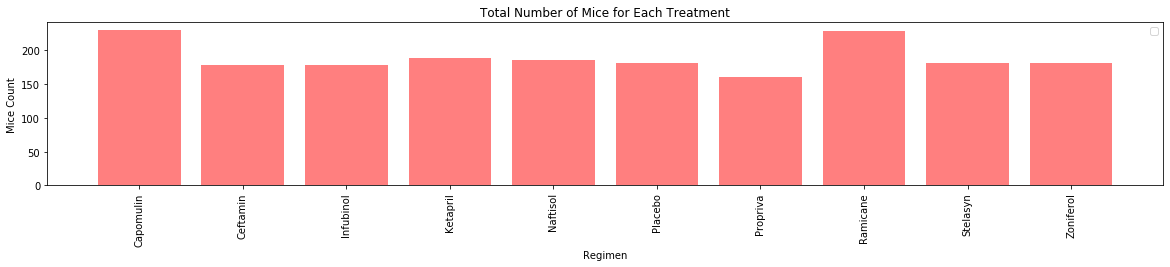

In [26]:
# NINETH CELL
# VALIDATED AS WORKING
# DEBUG!! Legend to displaying

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot. 
# NOTE: SWITCHED ORDER OF PIE CHARTS.  
# PYPLOT BAR CHART DISPLAYED FIRST IN NINETH CELL
# PANDA BAR CHART DISPLAYED SECOND IN TENTH CELL

# create a df of mice count for each treatment
mice_count_df = merge_no_dup_df.groupby("Drug Regimen").count()
mice_count_df

# Delete unneeded columns
del mice_count_df["Sex"]
del mice_count_df["Age_months"]
del mice_count_df["Weight (g)"]
del mice_count_df["Timepoint"]
del mice_count_df["Tumor Volume (mm3)"]
del mice_count_df["Metastatic Sites"]

# Set new column equal to index
mice_count_df['Regimen'] = mice_count_df.index

# Rename column
mice_count_df = mice_count_df.rename(columns={"Mouse ID": "Total Number of Mice"})
mice_count_df

# CREATE BAR PLOT
# Set x axis and tick locations
x_axis = np.arange(len(mice_count_df))
tick_locations = [value for value in x_axis]
x_axis

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_count_df["Total Number of Mice"], color='r', alpha=0.5, align="center")

# QUESTION:  What is tick_locations argument
plt.xticks(tick_locations, mice_count_df["Regimen"], rotation="vertical")

# QUESTION: xlim, ylim as percent - see activity 5.2.2

# Set a Title and labels
plt.title("Total Number of Mice for Each Treatment")
plt.legend()
plt.xlabel("Regimen")
plt.ylabel("Mice Count")


# Save our graph and show the grap
#plt.tight_layout()
#plt.savefig("Output/Total_Mice_by_Regimen.png")
plt.show()

Text(0, 0.5, 'Mice Count')

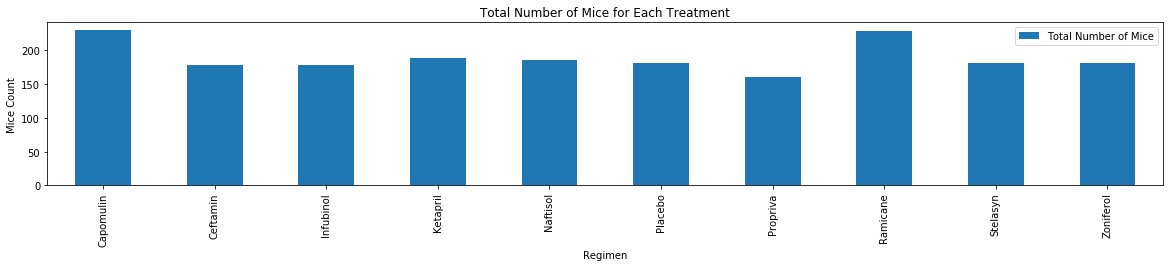

In [11]:
# DIAGNOSE SIMPLIFYING CODE
# TENTH CELL alternate method
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Use DataFrame.plot() in order to create a bar chart of the data
# xlabel and ylabel sourced from https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
mice_count_df.plot(kind="bar", figsize=(20,3), title="Total Number of Mice for Each Treatment")
#plt.set(xlabel="Regimen", ylabel="Mice Count")
plt.xlabel("Regimen")
plt.ylabel("Mice Count")
#plt.show()

# tells plot to render figure size that was stated
#plt.tight_layout()

[Text(0, 0.5, 'Mice Count'), Text(0.5, 0, 'Regimen')]

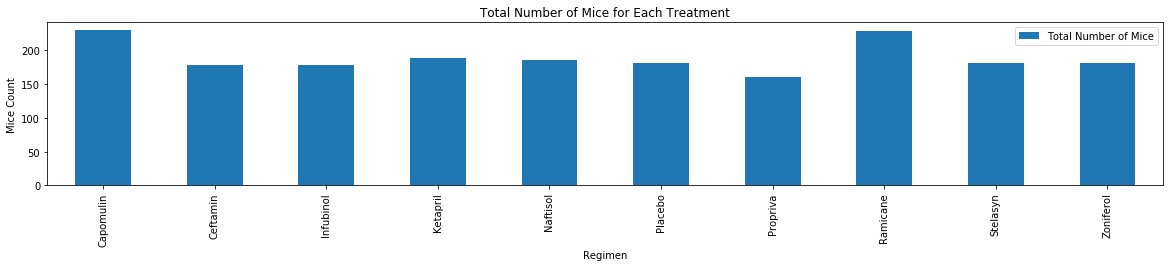

In [12]:
# TENTH CELL
# VALIDATED AS WORKING
# NOTE: SWITCHED ORDER OF PIE CHARTS.  
# PYPLOT BAR CHART DISPLAYED FIRST IN NINETH CELL
# PANDA BAR CHART DISPLAYED SECOND IN TENTH CELL

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Use DataFrame.plot() in order to create a bar chart of the data
# xlabel and ylabel sourced from https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
bar_plot = mice_count_df.plot(kind="bar", figsize=(20,3), title="Total Number of Mice for Each Treatment")
bar_plot.set(xlabel="Regimen", ylabel="Mice Count")

#plt.show()

# tells plot to render figure size that was stated
#plt.tight_layout()

In [13]:
# TENTH CELL ADDITIONAL INFORMATION
# Find number of mice per drug regimen
mice_count_df

,Total Number of Mice,Regimen
Drug Regimen,,
Capomulin,230,Capomulin
Ceftamin,178,Ceftamin
Infubinol,178,Infubinol
Ketapril,188,Ketapril
Naftisol,186,Naftisol
Placebo,181,Placebo
Propriva,161,Propriva
Ramicane,228,Ramicane
Stelasyn,181,Stelasyn


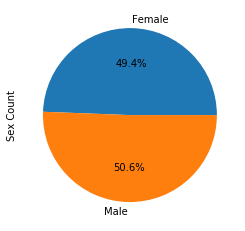

In [14]:
#ELEVENTH CELL
# VERIFIED AS WORKING
# NOTE:  Legend would not display any more infoamtion than the pie labels, so it was not employed for the pie chart

# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create df with just the needed info
mouse_sex_df = merge_no_dup_df.groupby("Sex").count()

# Removed unneeded columns
del mouse_sex_df["Drug Regimen"]
del mouse_sex_df["Age_months"]
del mouse_sex_df["Weight (g)"]

mouse_sex_df = mouse_sex_df.rename(columns={"Mouse ID": "Sex Count"})
mouse_sex_df["Sex Label"] = mouse_sex_df.index
mouse_sex_df
# DEBUg - # add a parameter Refer
mouse_sex_df['Sex Count'].plot(kind="pie", autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x23f38b91c48>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

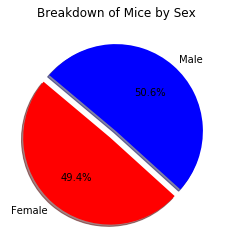

In [15]:
# TWELVETH CELL
# VERIFIED AS WORKING
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create df with just the needed info
mouse_sex_df = merge_no_dup_df.groupby("Sex").count()

# Removed unneeded columns
del mouse_sex_df["Drug Regimen"]
del mouse_sex_df["Age_months"]
del mouse_sex_df["Weight (g)"]

mouse_sex_df = mouse_sex_df.rename(columns={"Mouse ID": "Sex Count"})
mouse_sex_df["Sex Label"] = mouse_sex_df.index
mouse_sex_df

# Labels for the sections of our pie chart
labels = mouse_sex_df["Sex Label"]

# The values of each section of the pie chart
sizes = mouse_sex_df["Sex Count"]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.title("Breakdown of Mice by Sex")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Legend does nto add any more information than pie labels, so it was commented out
#plt.legend()

## Quartiles, Outliers and Boxplots

In [16]:
#THIRTEENTH CELL
# VERIFIED AS WORKING
# EACH REGIMEN"S TUMOR SIZE IN A SEPARATE COLUMN
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# refer to 5.1.09 - pie charts autopct

# Start by getting the last (greatest) timepoint for each mouse
# QUESTION -- Why does max_tumor = merge_no_dup_df.groupby(["Mouse ID"]) not produce df???
max_tumor_series = merge_no_dup_df.groupby(["Mouse ID"])['Timepoint'].max()

max_tumor_series = max_tumor_series.reset_index()
max_tumor_df = pd.DataFrame(max_tumor_series)

# Use inner merge to get full dataset with max timepoints only
# multiple column merge sourced from https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
full_max_tumor_df = pd.merge(max_tumor_df, merge_no_dup_df,  how='inner', on=["Mouse ID","Timepoint"])
full_max_tumor_df

full_max_tumor_4reg_df = full_max_tumor_df.loc[(full_max_tumor_df["Drug Regimen"] == "Capomulin") |
                                               (full_max_tumor_df["Drug Regimen"] == "Ramicane") |
                                               (full_max_tumor_df["Drug Regimen"] == "Infubinol") |
                                               (full_max_tumor_df["Drug Regimen"] == "Ceftamin"),:]
full_max_tumor_4reg_df

reduced_max_tumor_4reg_df = full_max_tumor_4reg_df[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_max_tumor_4reg_df
## df_columns = Regimen, Mouse ID, Timepoint(max), Tumor Volumne (mm3)

# Capomulin only with just the Tumor Volume
max_tumor_capo_df = reduced_max_tumor_4reg_df.loc[(reduced_max_tumor_4reg_df["Drug Regimen"] == "Capomulin") ,:]
max_tumor_capo_df

# Ramicane only with just the Tumor Volume
max_tumor_rami_df = reduced_max_tumor_4reg_df.loc[(reduced_max_tumor_4reg_df["Drug Regimen"] == "Ramicane") ,:]
max_tumor_rami_df

# Infubinol only with just the Tumor Volume
max_tumor_infu_df = reduced_max_tumor_4reg_df.loc[(reduced_max_tumor_4reg_df["Drug Regimen"] == "Infubinol") ,:]
max_tumor_infu_df

# Ceftamin only with just the Tumor Volume
max_tumor_ceft_df = reduced_max_tumor_4reg_df.loc[(reduced_max_tumor_4reg_df["Drug Regimen"] == "Ceftamin") ,:]
max_tumor_ceft_df

# Combine max tumor dfs into a single df with each Regimens final tumor size population in a separate column
#max_tumor_4reg_df = {"Capomulin Max Tumor Size (mm3)": max_tumor_capo_df["Tumor Volume (mm3)"]}
#max_tumor_4reg_df = max_tumor_capo_df
#max_tumor_4reg_df = max_tumor_4reg_df.rename(columns={"Tumor Volume(mm3)": "Capomulin Tumor Size (mm3)"})
#max_tumor_4reg_df

# Print final tumor size for each mouse for all 4 regimens: Capomulin, ramicane, Infubinol, Ceftamin
full_max_tumor_4reg_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
3,a275,45,Ceftamin,Female,20,28,63.00,3
6,a411,45,Ramicane,Male,3,22,38.41,1
7,a444,45,Ramicane,Female,10,25,43.05,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.59,4
240,y793,45,Capomulin,Male,17,17,31.90,2
241,y865,45,Ceftamin,Male,23,26,64.73,3
245,z578,45,Ramicane,Male,11,16,30.64,0


In [17]:
# FOURTEENTH CELL
# VERIFIED AS WORKING

# Create Dataframe of Capomulin Tumor Size
# QUESTION:  should full_max_tumor_df be changed to full_max_tumor_4reg_df???
full_max_tumor_cap = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Capomulin"),:]
full_max_tumor_cap = full_max_tumor_cap["Tumor Volume (mm3)"]

#print(full_max_tumor_cap)    
#print(full_max_tumor_cap)                                                        
# For Capomulin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# find quartiles 1 at a time
# DEBUG!! - Code breaks here - why????  Modeled after 5.3.2 Activity
# DEBUG!! - does not work:  quartiles_cap = full_max_tumor_cap.quantile([.25,.5,.75])
lowerq_cap = full_max_tumor_cap.quantile(0.25)
median_cap = full_max_tumor_cap.quantile(0.5)
upperq_cap = full_max_tumor_cap.quantile(0.75)
iqr_cap = upperq_cap-lowerq_cap

print("--------------")
print("For Capomulin:")
print("--------------")
print(f"The lower quartile of the final tumor size is: {lowerq_cap}")
print(f"The upper quartile of the final tumor size is: {upperq_cap}")
print(f"The interquartile range of the final tumor size is: {round(iqr_cap,2)}")
print(f"The the median of the final tumor size is: {median_cap} ")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {round(lower_bound_cap,2)} could be outliers.")
print(f"Values above {round(upper_bound_cap,2)} could be outliers.")
print("-------------------------------------\n\n")


# Create Dataframe of Ramicane Tumor Size
# QUESTION:  should full_max_tumor_df be changed to full_max_tumor_4reg_df???
full_max_tumor_ram = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Ramicane"),:]
full_max_tumor_ram = full_max_tumor_ram["Tumor Volume (mm3)"]

#print(full_max_tumor_cap)    
#print(full_max_tumor_cap)                                                        
# For Ramicane: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# find quartiles 1 at a time
# DEBUG!! - Code breaks here - why????  Modeled after 5.3.2 Activity
lowerq_ram = full_max_tumor_ram.quantile(0.25)
median_ram = full_max_tumor_ram.quantile(0.5)
upperq_ram = full_max_tumor_ram.quantile(0.75)
iqr_ram = upperq_ram - lowerq_ram

print("--------------")
print("For Ramicane:")
print("--------------")
print(f"The lower quartile of the final tumor size is: {lowerq_ram}")
print(f"The upper quartile of the final tumor size is: {upperq_ram}")
print(f"The interquartile range of the final tumor size is: {round(iqr_ram,2)}")
print(f"The the median of the final tumor size is: {median_ram} ")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {round(lower_bound_ram,2)} could be outliers.")
print(f"Values above {round(upper_bound_ram,2)} could be outliers.")
print("-------------------------------------\n\n")


# Create Dataframe of Infubinol Tumor Size
# QUESTION:  should full_max_tumor_df be changed to full_max_tumor_4reg_df???
full_max_tumor_inf = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Infubinol"),:]
full_max_tumor_inf = full_max_tumor_inf["Tumor Volume (mm3)"]

#print(full_max_tumor_cap)    
#print(full_max_tumor_cap)                                                        
# For Infubinol: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# find quartiles 1 at a time
# DEBUG!! - Code breaks here - why????  Modeled after 5.3.2 Activity
lowerq_inf = full_max_tumor_inf.quantile(0.25)
median_inf = full_max_tumor_inf.quantile(0.5)
upperq_inf = full_max_tumor_inf.quantile(0.75)
iqr_inf = upperq_inf - lowerq_inf

print("--------------")
print("For Infubinol:")
print("--------------")
print(f"The lower quartile of the final tumor size is: {lowerq_inf}")
print(f"The upper quartile of the final tumor size is: {upperq_inf}")
print(f"The interquartile range of the final tumor size is: {round(iqr_inf,2)}")
print(f"The the median of the final tumor size is: {median_inf} ")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {round(lower_bound_inf,2)} could be outliers.")
print(f"Values above {round(upper_bound_inf,2)} could be outliers.")
print("-------------------------------------\n\n")


# Create Dataframe of Ceftamin Tumor Size
# QUESTION:  should full_max_tumor_df be changed to full_max_tumor_4reg_df???
full_max_tumor_cef = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Ceftamin"),:]
full_max_tumor_cef = full_max_tumor_cef["Tumor Volume (mm3)"]

#print(full_max_tumor_cap)    
#print(full_max_tumor_cap)                                                        
# For Ceftamin: Calculate the IQR and quantitatively determine if there are any potential outliers. 
# find quartiles 1 at a time
# DEBUG!! - Code breaks here - why????  Modeled after 5.3.2 Activity
lowerq_cef = full_max_tumor_cef.quantile(0.25)
median_cef = full_max_tumor_cef.quantile(0.5)
upperq_cef = full_max_tumor_cef.quantile(0.75)
iqr_cef = upperq_cef - lowerq_cef

print("--------------")
print("For Ceftamin:")
print("--------------")
print(f"The lower quartile of the final tumor size is: {lowerq_cef}")
print(f"The upper quartile of the final tumor size is: {upperq_cef}")
print(f"The interquartile range of the final tumor size is: {round(iqr_cef,2)}")
print(f"The the median of the final tumor size is: {median_cef} ")

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {round(lower_bound_cef,2)} could be outliers.")
print(f"Values above {round(upper_bound_cef,2)} could be outliers.")
print("-------------------------------------\n\n")

--------------
For Capomulin:
--------------
The lower quartile of the final tumor size is: 32.38
The upper quartile of the final tumor size is: 40.16
The interquartile range of the final tumor size is: 7.78
The the median of the final tumor size is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-------------------------------------


--------------
For Ramicane:
--------------
The lower quartile of the final tumor size is: 31.56
The upper quartile of the final tumor size is: 40.66
The interquartile range of the final tumor size is: 9.1
The the median of the final tumor size is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
-------------------------------------


--------------
For Infubinol:
--------------
The lower quartile of the final tumor size is: 54.05
The upper quartile of the final tumor size is: 65.53
The interquartile range of the final tumor size is: 11.48
The the median of the final tumor size is: 60

In [18]:
#FOURTEENTH CELL V2 - REDO WITH LOOP TO BE MORE EFFICIENT
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# for drug in drug_list

# Create empty list to fill with tumor vol data (for plotting)
# pass a list as a parameter

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds



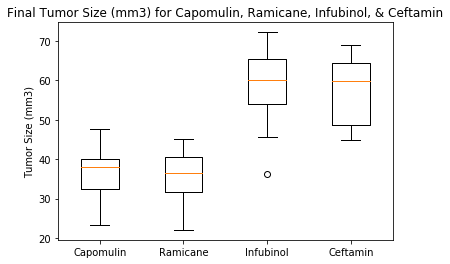

In [19]:
#FIFTEENTH CELL V2
# VERIFIED AS WORKING
# NOTE:  LEGEND GENERATES PINK BOX:  "No handles with labels found to put in legend" so it was commented out
# Create Dataframe of Capomulin Tumor Size
full_max_tumor_capomulin_df = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Capomulin"),:]
full_max_tumor_capomulin_df

full_max_tumor_capomulin_df = pd.DataFrame(full_max_tumor_capomulin_df["Tumor Volume (mm3)"])
full_max_tumor_capomulin_df

full_max_tumor_capomulin_df = full_max_tumor_capomulin_df.rename(columns={"Tumor Volume (mm3)": "Capomulin Tumor Volume (mm3)"})
full_max_tumor_capomulin_df

# Create Dataframe of Ramicane Tumor Size
full_max_tumor_ramicane_df = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Ramicane"),:]
full_max_tumor_ramicane_df = pd.DataFrame(full_max_tumor_ramicane_df["Tumor Volume (mm3)"])

full_max_tumor_ramicane_df = full_max_tumor_ramicane_df.rename(columns={"Tumor Volume (mm3)": "Ramicane Tumor Volume (mm3)"})
full_max_tumor_ramicane_df

# Create Dataframe of Infubinol Tumor Size
full_max_tumor_infubinol_df = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Infubinol"),:]
full_max_tumor_infubinol_df = pd.DataFrame(full_max_tumor_infubinol_df["Tumor Volume (mm3)"])

full_max_tumor_infubinol_df = full_max_tumor_infubinol_df.rename(columns={"Tumor Volume (mm3)": "Infubinol Tumor Volume (mm3)"})
full_max_tumor_infubinol_df

# Create Dataframe of Ceftamin Tumor Size
full_max_tumor_ceftamin_df = full_max_tumor_4reg_df.loc[(full_max_tumor_df["Drug Regimen"] == "Ceftamin"),:]
full_max_tumor_ceftamin_df = pd.DataFrame(full_max_tumor_ceftamin_df["Tumor Volume (mm3)"])

full_max_tumor_ceftamin_df = full_max_tumor_ceftamin_df.rename(columns={"Tumor Volume (mm3)": "Ceftamin Tumor Volume (mm3)"})
full_max_tumor_ceftamin_df


# Create Box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size (mm3) for Capomulin, Ramicane, Infubinol, & Ceftamin')
#ax1.set_xlabel("Capomulin")
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot([full_max_tumor_capomulin_df["Capomulin Tumor Volume (mm3)"],full_max_tumor_ramicane_df["Ramicane Tumor Volume (mm3)"],full_max_tumor_infubinol_df["Infubinol Tumor Volume (mm3)"],full_max_tumor_ceftamin_df["Ceftamin Tumor Volume (mm3)"]])

# x-axis labels sourced from https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#plt.legend()
plt.show()

## Line and Scatter Plots

No handles with labels found to put in legend.


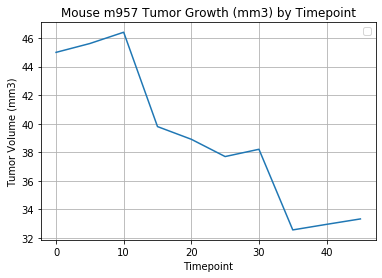

In [20]:
# SIXTEENTH CELL
# VERIFIED AS WORKING
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# List all rows under Capomulin Drug Regimen for visual selection
mouse_capomulin = merge_no_dup_df.loc[merge_no_dup_df["Drug Regimen"] == "Capomulin", :]
#print(mouse_capomulin)

# DEBUG - Do just for Capumolin
# tried Select mouse ID = b559 (naftisol), z969 (naftisol), m957 (capomulin) with only columns of interest

# Return all rows for Mouse ID m957
mouse_m957 = mouse_capomulin.loc[(merge_no_dup_df["Mouse ID"] == "m957"), :]
mouse_m957
mouse_m957_timeseries = mouse_m957[["Timepoint", "Tumor Volume (mm3)"]]
mouse_m957_timeseries

# Create x axis timepoint
x_axis = mouse_m957_timeseries["Timepoint"]
x_axis

# Plot our line that will track tumor size over the timepoint
plt.plot(x_axis, mouse_m957_timeseries["Tumor Volume (mm3)"])

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend()
plt.title("Mouse m957 Tumor Growth (mm3) by Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#plt.label("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
#plt.sticklabels(x_axis)
plt.grid()
plt.legend()

# Print our chart to the screen

#merge_no_dup_df

No handles with labels found to put in legend.


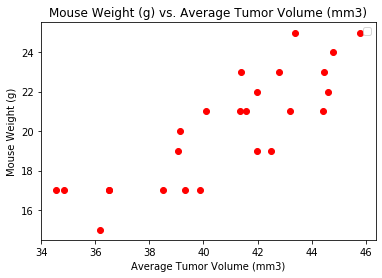

In [21]:
# SEVENTEENTH CELL
# VERIFIED AS WORKING
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# List mice under Capomulin Drug Regimen for visual selection
mouse_capomulin = merge_no_dup_df.loc[merge_no_dup_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Find Average weight and tumor size for each mouse
grouped_mouse_capomulin = mouse_capomulin.groupby("Mouse ID").mean()
#print(grouped_mouse_capomulin)

# Create Scatter Plot
x_axis = grouped_mouse_capomulin["Tumor Volume (mm3)"]
y_axis = grouped_mouse_capomulin["Weight (g)"]
plt.title("Mouse Weight (g) vs. Average Tumor Volume (mm3)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.legend()
plt.scatter(x_axis, y_axis, marker="o", color="red")

## Correlation and Regression

No handles with labels found to put in legend.


The correlation between both factors is 0.84


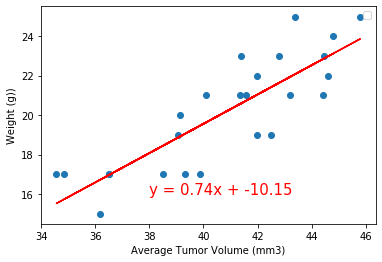

In [22]:
# EIGHTEENTH CELL
# VERIFIED AS WORKING
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
#correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
x_values = grouped_mouse_capomulin["Tumor Volume (mm3)"]
y_values = grouped_mouse_capomulin["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,16),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g))')
plt.legend()
plt.show()


In [23]:
# NINETEENTH CELL
# VERIFIED AS WORKING
# FIND INITIAL TUMOR SIZE

# find initial timepoint for each mouse
min_tumor_series = merge_no_dup_df.groupby(["Mouse ID"])['Timepoint'].min()

min_tumor_series = min_tumor_series.reset_index()
min_tumor_df = pd.DataFrame(min_tumor_series)

# Use inner merge to get full dataset with min timepoints only
# multiple column merge sourced from https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
full_min_tumor_df = pd.merge(min_tumor_df, merge_no_dup_df,  how='inner', on=["Mouse ID","Timepoint"])
full_min_tumor_df

full_min_tumor_4reg_df = full_min_tumor_df.loc[(full_min_tumor_df["Drug Regimen"] == "Capomulin") |
                                               (full_min_tumor_df["Drug Regimen"] == "Ramicane") |
                                               (full_min_tumor_df["Drug Regimen"] == "Infubinol") |
                                               (full_min_tumor_df["Drug Regimen"] == "Ceftamin"),:]
full_min_tumor_4reg_df

reduced_min_tumor_4reg_df = full_min_tumor_4reg_df[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_min_tumor_4reg_df
## df_columns = Regimen, Mouse ID, Timepoint(max), Tumor Volumne (mm3)

# Capomulin only with just the initial Tumor Volume
min_tumor_capo_df = reduced_min_tumor_4reg_df.loc[(reduced_min_tumor_4reg_df["Drug Regimen"] == "Capomulin") ,:]
min_tumor_capo_df

# Ramicane only with just the initial Tumor Volume
min_tumor_rami_df = reduced_min_tumor_4reg_df.loc[(reduced_min_tumor_4reg_df["Drug Regimen"] == "Ramicane") ,:]
min_tumor_rami_df

# Infubinol only with just the initial Tumor Volume
min_tumor_infu_df = reduced_min_tumor_4reg_df.loc[(reduced_min_tumor_4reg_df["Drug Regimen"] == "Infubinol") ,:]
min_tumor_infu_df

# Ceftamin only with just the initial Tumor Volume
min_tumor_ceft_df = reduced_min_tumor_4reg_df.loc[(reduced_min_tumor_4reg_df["Drug Regimen"] == "Ceftamin") ,:]
min_tumor_ceft_df


# Print initial tumor size for each mouse for all 4 regimens: Capomulin, ramicane, Infubinol, Ceftamin
full_min_tumor_4reg_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
3,a275,0,Ceftamin,Female,20,28,45.0,0
6,a411,0,Ramicane,Male,3,22,45.0,0
7,a444,0,Ramicane,Female,10,25,45.0,0
...,...,...,...,...,...,...,...,...
240,y769,0,Ceftamin,Female,6,27,45.0,0
241,y793,0,Capomulin,Male,17,17,45.0,0
242,y865,0,Ceftamin,Male,23,26,45.0,0
246,z578,0,Ramicane,Male,11,16,45.0,0


In [24]:
# TWENTIETH CELL
# VERIFIED AS WORKING
# CALCULATE TUMOR REDUCTION FOR EACH MOUSE

# Tumor reduction = initial volume - final volume (mm3)
size_delta_4reg_df = full_min_tumor_4reg_df
size_delta_4reg_df["Final Tumor Volume (mm3)"] = full_max_tumor_4reg_df["Tumor Volume (mm3)"]
size_delta_4reg_df["Tumor Volume Delta (mm3)"] = full_min_tumor_4reg_df["Tumor Volume (mm3)"] - full_max_tumor_4reg_df["Tumor Volume (mm3)"]
size_delta_4reg_df

# Rename Column
size_delta_4reg_df = size_delta_4reg_df.rename(columns={"Tumor Volume (mm3)": "Initial Tumor Volume (mm3)"})
size_delta_4reg_df

# Drop rows with NaN in Tumor Volume Delta
# QUESTION:  WHERE DID NaN values come from???
size_delta_4reg_df = size_delta_4reg_df.dropna()
size_delta_4reg_df.head()


C:\Users\small\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\small\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Initial Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3),Tumor Volume Delta (mm3)
0,a203,0,Infubinol,Female,20,23,45.0,0,67.97,-22.97
1,a251,0,Infubinol,Female,21,25,45.0,0,65.53,-20.53
3,a275,0,Ceftamin,Female,20,28,45.0,0,63.00,-18.00
6,a411,0,Ramicane,Male,3,22,45.0,0,38.41,6.59
7,a444,0,Ramicane,Female,10,25,45.0,0,43.05,1.95


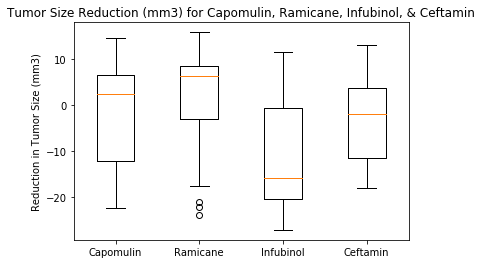

In [25]:
# TWENTYFIRST CELL
# VERIFIED AS WORKING
# Plot all 4 principle drug regimen tumor size deltas to find which drugs were most effective a reducing tumor size.

# Capomulin only with just the initial Tumor Volume
delta_tumor_capo_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Capomulin") ,:]
delta_tumor_capo_df

# Ceftamin only with just the initial Tumor Volume
delta_tumor_ceft_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Ceftamin") ,:]
delta_tumor_ceft_df

# Infubinol only with just the initial Tumor Volume
delta_tumor_infu_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Infubinol") ,:]
delta_tumor_infu_df

# Ketapril
# Ketapril only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Ketapril") ,:]
#delta_tumor_rami_df

# Naftisol
# Naftisol only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Naftisol") ,:]
#delta_tumor_rami_df

# Placebo
# Placebo only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Placebo") ,:]
#delta_tumor_rami_df

# Propriva
# Propriva only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Propriva") ,:]
#delta_tumor_rami_df

# Ramicane only with just the initial Tumor Volume
delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Ramicane") ,:]
delta_tumor_rami_df

# Stelasyn
# Stelasyn only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Stelasyn") ,:]
#delta_tumor_rami_df

# Stelasyn
# Stelasyn only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Stelasyn") ,:]
#delta_tumor_rami_df

#Zoniferol
# Zoniferol only with just the initial Tumor Volume
#delta_tumor_rami_df = size_delta_4reg_df.loc[(size_delta_4reg_df["Drug Regimen"] == "Zoniferol") ,:]
#delta_tumor_rami_df


# Create Box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size Reduction (mm3) for Capomulin, Ramicane, Infubinol, & Ceftamin')
#ax1.set_xlabel("Capomulin")
ax1.set_ylabel('Reduction in Tumor Size (mm3)')
ax1.boxplot([delta_tumor_capo_df["Tumor Volume Delta (mm3)"],delta_tumor_rami_df["Tumor Volume Delta (mm3)"],delta_tumor_infu_df["Tumor Volume Delta (mm3)"],delta_tumor_ceft_df["Tumor Volume Delta (mm3)"]])

# x-axis labels sourced from https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#plt.legend()
plt.show()


